In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import seaborn as sns

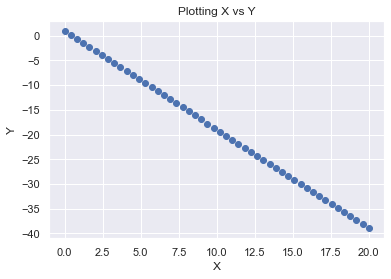

In [11]:
X=np.linspace(0, 20)
Y=-2*X+1
sns.set()
_=plt.scatter(X,Y)
_=plt.xlabel("X")
_=plt.ylabel("Y")
_=plt.title("Plotting X vs Y")

# Adagrad

In [12]:
def Adagrad(X,Y,alpha,epochs,eps):
    theta0=theta1=0.0
    m=len(X)
    allpredictions=[]
    thetas0=[]
    thetas1=[]
    losses=np.array([])
    accum_grad0=accum_grad1=0.0
    e=1e-8
    for i in range(epochs):
        # for every epoch list all the losses and predictions
        y_pred=theta0+theta1*X
        allpredictions.append(y_pred)
        thetas0.append(theta0)
        thetas1.append(theta1)
        losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
        grad0=np.sum((y_pred-Y))/m
        grad1=np.sum((y_pred-Y)@X)/m
        grad=[grad0,grad1]
        accum_grad0+=(grad0)**2
        accum_grad1+=(grad1)**2

        theta0=theta0-(alpha/np.sqrt(accum_grad0+e))*grad0
        theta1=theta1-(alpha/np.sqrt(accum_grad1+e))*grad1
        if np.linalg.norm(grad)<=eps:
            return thetas0,thetas1,losses,allpredictions,theta0,theta1
    return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [13]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=Adagrad(X,Y,0.1,30000,1e-3)
theta0,theta1

(0.997113219683624, -1.9997803086120263)

## r2_score

In [14]:
r2_score(Y,allpredictions[-1])

0.9999999844969256

## plot the optimal fitted line

Text(0, 0.5, 'Y')

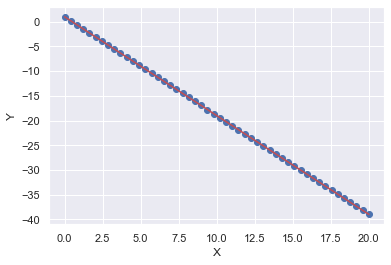

In [15]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')

# RMSProp

In [21]:
def RMSProp(X,Y,alpha,epochs,eps,gamma):
    theta0=theta1=0.0
    m=len(X)
    allpredictions=[]
    thetas0=[]
    thetas1=[]
    losses=np.array([])
    E_grad0=E_grad1=0.0
    e=1e-8
    for i in range(epochs):
        # for every epoch list all the losses and predictions
        y_pred=theta0+theta1*X
        allpredictions.append(y_pred)
        thetas0.append(theta0)
        thetas1.append(theta1)
        losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
        grad0=np.sum((y_pred-Y))/m
        grad1=np.sum((y_pred-Y)@X)/m
        grad=[grad0,grad1]
        E_grad0=E_grad0*gamma+0.1*(grad0**2)
        E_grad1=E_grad1*gamma+0.1*(grad1*2)

        theta0=theta0-(alpha/np.sqrt(E_grad0+e))*grad0
        theta1=theta1-(alpha/np.sqrt(E_grad1+e))*grad1
        if np.linalg.norm(grad)<=eps:
            return thetas0,thetas1,losses,allpredictions,theta0,theta1
    return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [30]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.9)

## r2_score

In [42]:
r2_score(Y,allpredictions[-1])

0.99999999715003

## plot the optimal fitted line

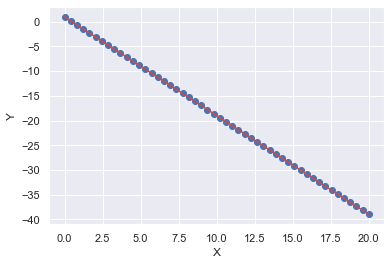

In [43]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Adam

In [53]:
def ADAM(X,Y,alpha,epochs,eps,beta1,beta2):
    theta0=theta1=0.0
    m=len(X)
    allpredictions=[]
    thetas0=[]
    thetas1=[]
    losses=np.array([])
    mt1=mt0=vt0=vt1=mt_0=mt_1=vt_0=vt_1=0.0
    e=1e-8
    for i in range(epochs):
        # for every epoch list all the losses and predictions
        y_pred=theta0+theta1*X
        allpredictions.append(y_pred)
        thetas0.append(theta0)
        thetas1.append(theta1)
        losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
        grad0=np.sum((y_pred-Y))/m
        grad1=np.sum((y_pred-Y)@X)/m
        grad=[grad0,grad1]
        # decaying averages of past gradients
        mt_0=mt_0*beta1+(1-beta1)*grad0
        mt_1=mt_1*beta1+(1-beta1)*grad1
        # decaying averages of past squared gradients
        vt_0=beta2*vt_0+(1-beta2)*(grad0**2)
        vt_1=beta2*vt_1+(1-beta2)*(grad1**2)
        # bias-corrected first moment
        mt0=mt_0/(1-beta1)
        mt1=mt_1/(1-beta1)
        # bias-corrected second moment
        vt0=vt_0/(1-beta2)
        vt1=vt_1/(1-beta2)
        # update theta0 and theta1 
        theta0=theta0-(alpha/(np.sqrt(vt0)+e))*mt0
        theta1=theta1-(alpha/(np.sqrt(vt1)+e))*mt1
        # Stop condition
        if np.linalg.norm(grad)<=eps:
            return thetas0,thetas1,losses,allpredictions,theta0,theta1
    return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [54]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=ADAM(X,Y,0.01,100000,1e-3,0.9,0.999)

## r2_score

In [55]:
r2_score(Y,allpredictions[-1])

0.9999999838286857

## plot the optimal fitted line

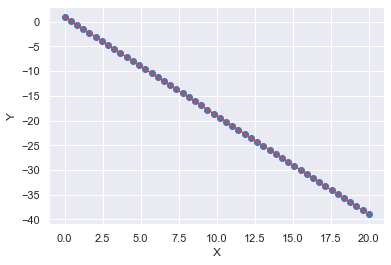

In [56]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()